In [7]:
from py2neo import Graph, NodeSelector
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker, style

style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

graph = Graph("http://localhost:7474", password = "admin")

In [2]:
data = DataFrame(graph.data("MATCH (s:Subjekt) WITH s.community as c, count(s) as count RETURN c, count"))

In [3]:
data.sort_values('count').tail(20)

c  count
913573   1613750   1357
443659    816083   1470
276717    517585   1624
247117    463672   1696
494767    905345   1702
551845   1004291   1872
1497901  2589047   1945
440804    811033   2044
223999    421439   2056
888344   1572252   2152
1138145  1977100   2217
7600       14573   2944
898353   1588726   3091
1231268  2147374   3281
22514      43210   3467
1018662  1784676   3693
149116    282664   4328
148215    280909   5325
956727   1684060  10642
669845   1206741  10749

In [4]:
data.count()

c        1863218
count    1863218
dtype: int64

In [5]:
data['count'].mean()

1.6995890980014148

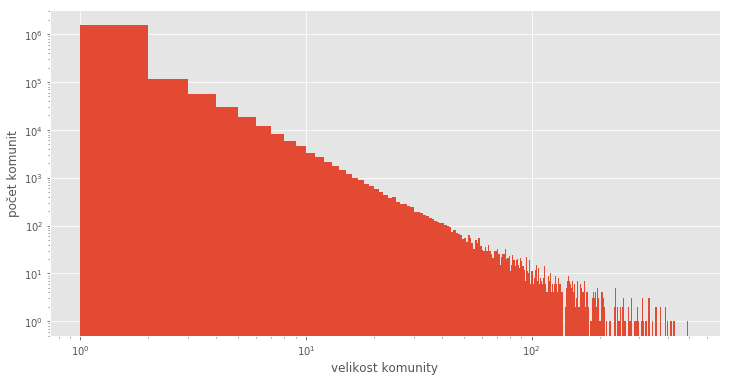

In [21]:
binwidth = 1

fig, axes = plt.subplots()
axes.set_xlabel("velikost komunity")
axes.set_ylabel("počet komunit")
axes.set_yscale('log')
axes.set_xscale('log')
axes.hist(data['count'], bins=range(0, 500, binwidth), rwidth=1)
fig.savefig("vystup/komunity-louvain.pdf", bbox_inches='tight')

In [9]:
data2 = DataFrame(graph.data("MATCH (s:Subjekt) WITH s.component as c, count(s) as count RETURN c, count"))

In [10]:
data2.sort_values('count').tail(10)

c    count
1116650  2129764       31
1153054  2196196       34
1117132  2132642       36
1116948  2131167       38
1076551  2039625       39
1117608  2136510       40
1232603  2345105       43
1170476  2229394       56
1568793  2946250       59
1115768  2126383  1253308

In [11]:
data2.count()

c        1695025
count    1695025
dtype: int64

In [12]:
data2['count'].median()

1.0

In [13]:
binwidth = 1

fig, axes = plt.subplots()
axes.set_xlabel("velikost komunity")
axes.set_ylabel("počet komunit")
axes.set_yscale('log')
axes.set_xscale('log')
axes.hist(data2['count'], bins=range(0, 500, binwidth), rwidth=1)
fig.savefig("vystup/komunity-sk.pdf", bbox_inches='tight')

In [14]:
data3 = DataFrame(graph.data("MATCH (s:Subjekt) WITH s.partition as c, count(s) as count RETURN c, count"))

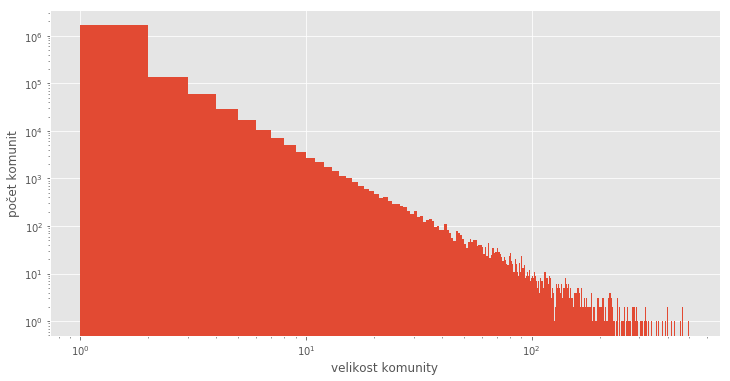

In [15]:
binwidth = 1

fig, axes = plt.subplots()
axes.set_xlabel("velikost komunity")
axes.set_ylabel("počet komunit")
axes.set_yscale('log')
axes.set_xscale('log')
axes.hist(data3['count'], bins=range(0, 500, binwidth), rwidth=1)
fig.savefig("vystup/komunity-lp.pdf", bbox_inches='tight')

In [16]:
data3.sort_values('count').tail(10)

c  count
1447608  2351325   1636
994039   1630403   1892
1504944  2442005   1987
1719011  2761895   2290
1809890  2895640   2555
1940541  3085979   2562
161642    282664   2889
1546502  2505894   4521
1028971  1684060   5342
1829963  2924439   7842

In [17]:
data3.count()

c        1996836
count    1996836
dtype: int64

In [18]:
data3['count'].mean()

1.5858613326282178